# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [2]:
sps.expon(scale=1).rvs(size=(3, 5))

array([[2.08333734, 1.15866536, 1.83278161, 1.06811504, 1.00913042],
       [0.12382236, 3.11884273, 0.38705955, 2.5161875 , 3.35901828],
       [4.24584923, 0.65681912, 0.53297195, 0.91977766, 0.42057766]])

In [3]:
SIZE = 300  # количество случайных величин
SAMPLES_COUNT = 500  # количество выборок

# 500 массивов размером 300 каждый 
samples = sps.expon(scale=1).rvs(size=(SAMPLES_COUNT, SIZE))
cum_sums = samples.cumsum(axis=1)
MEAN_VALUES =  np.arange(SIZE)
clt_values = (cum_sums - MEAN_VALUES - 1) / (MEAN_VALUES + 1)**0.5

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

In [4]:
def plot_clt(cur_clt_values: np.array, distr_name: str):
    with sns.axes_style("darkgrid"):
        fig, axis = plt.subplots()
        fig.set_size_inches(15, 8)

        # рисуем для каждой выборки отдельно
        for i in range(SAMPLES_COUNT):
            axis.plot(np.arange(SIZE) + 1, cur_clt_values[i], color='green', alpha=0.05)

        axis.set_xlabel('Количество случайных величин', fontsize=18)
        axis.set_ylabel('Значения элемента последовательности из ЦПТ', fontsize=16)
        axis.grid(':')
        axis.set_title('Визуализация сходимости ЦПТ для распределения ' + \
                       distr_name, fontsize=18)
        axis.set_xlim((0, SIZE))
        return 

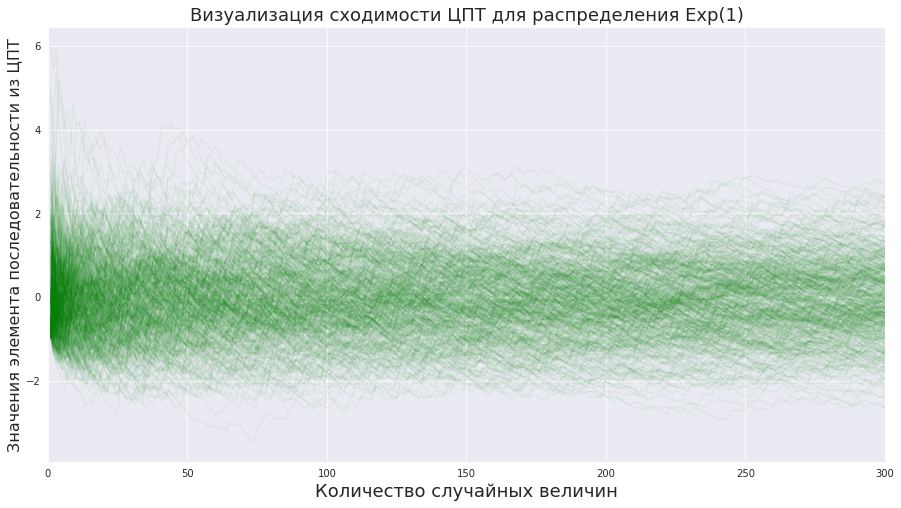

In [5]:
plot_clt(clt_values, distr_name=r'Exp(1)')

`Вывод:` Как видно из графика значения $Z_{jn}$ не сходятся ни к какой константе.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

In [6]:
def plot_clt_hist(cur_clt_values: np.array, xmin: float, xmax: float,
                 distr_name: str):
    with sns.axes_style("darkgrid"):
        grid = np.linspace(xmin, xmax, 600)
        fig, axis = plt.subplots()
        fig.set_size_inches(15, 8)
        
        axis.plot(
            grid,
            sps.norm(loc=0,scale=1).pdf(grid),
            color='r',
            linewidth=3,
            label=r'Плотность $\xi\sim\mathcal{N}(0, 1)$',
        )
        

        axis.hist(
            cur_clt_values.T[SIZE - 1],
            bins=15,
            density=True,
            alpha=0.5,
            label=r'Значения 300-ых случаных величин из всех выборок'
        )

        axis.legend(loc='best', fontsize=11)
        axis.grid(ls=':')
        axis.set_title(r'Распределение значений $Z_{j, 300}$ с распределением ' + \
                       distr_name, fontsize=18)
        return 

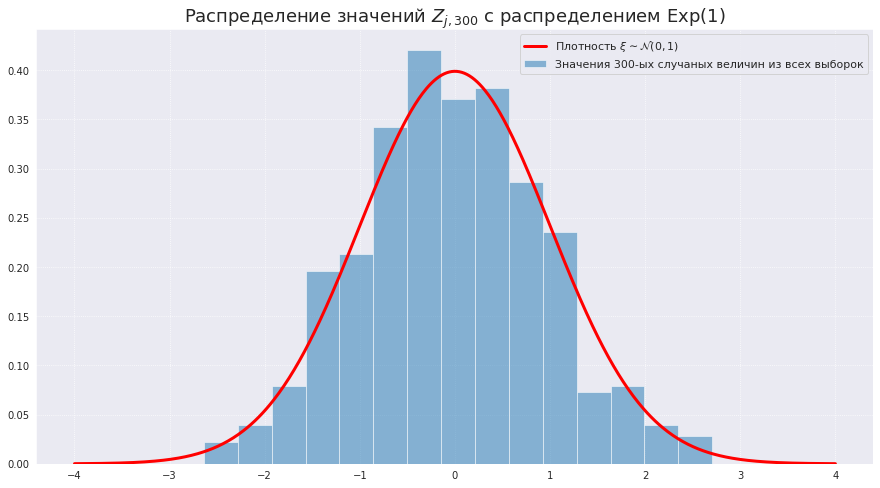

In [7]:
plot_clt_hist(clt_values, xmin=-4, xmax=4, distr_name=r'Exp(1)')

`Вывод:` гистограмма значений случайных величин $Z_{1,300}, ..., Z_{500,300}$ действительно похожа на нормальное распределение.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

##  Визуализация ЦПТ для $U(0,1)$

In [8]:
samples_uni = sps.uniform().rvs(size=(SAMPLES_COUNT, SIZE))
cum_sums_uni = samples_uni.cumsum(axis=1) 
clt_values_uni = (cum_sums_uni - MEAN_VALUES*0.5 - 0.5) / ((MEAN_VALUES + 1)*1/12)**0.5

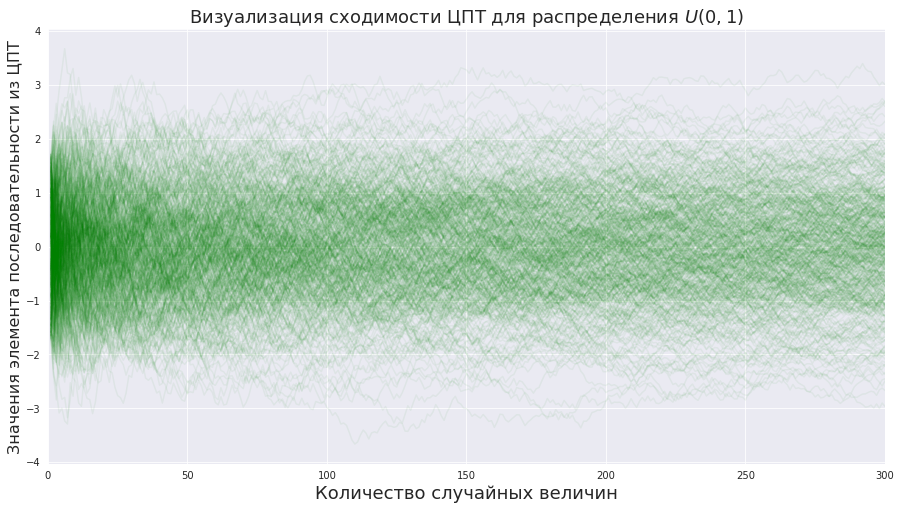

In [9]:
plot_clt(clt_values_uni, distr_name=r'$U(0,1)$')

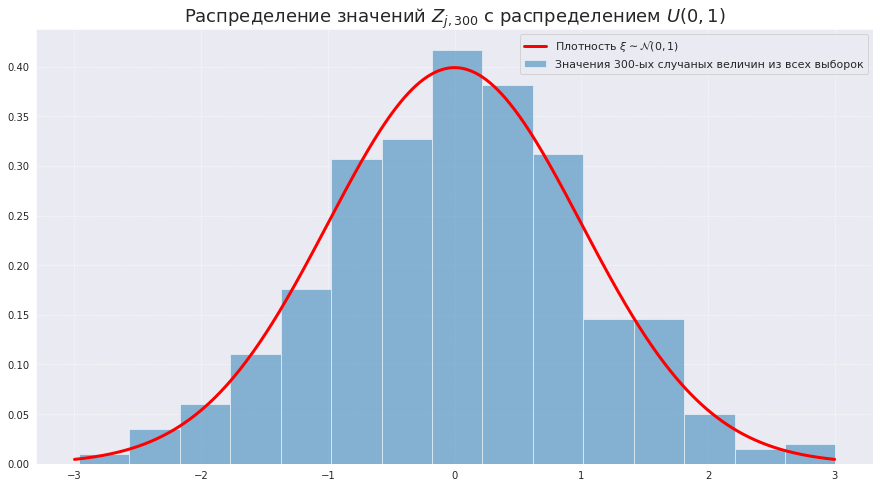

In [10]:
plot_clt_hist(clt_values_uni, xmin=-3, xmax=3, distr_name=r'$U(0, 1)$')

##  Визуализация ЦПТ для $Pois(1)$

In [11]:
samples_pois = sps.poisson(mu=1).rvs(size=(SAMPLES_COUNT, SIZE))
cum_sums_pois = samples_pois.cumsum(axis=1) 
clt_values_pois = (cum_sums_pois - MEAN_VALUES - 1) / ((MEAN_VALUES + 1)*1)**0.5

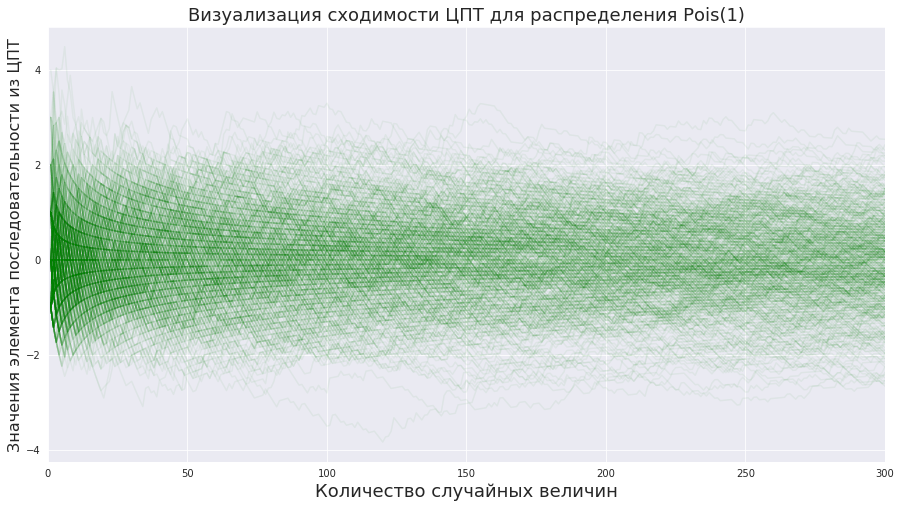

In [12]:
plot_clt(clt_values_pois, distr_name=r'Pois(1)')

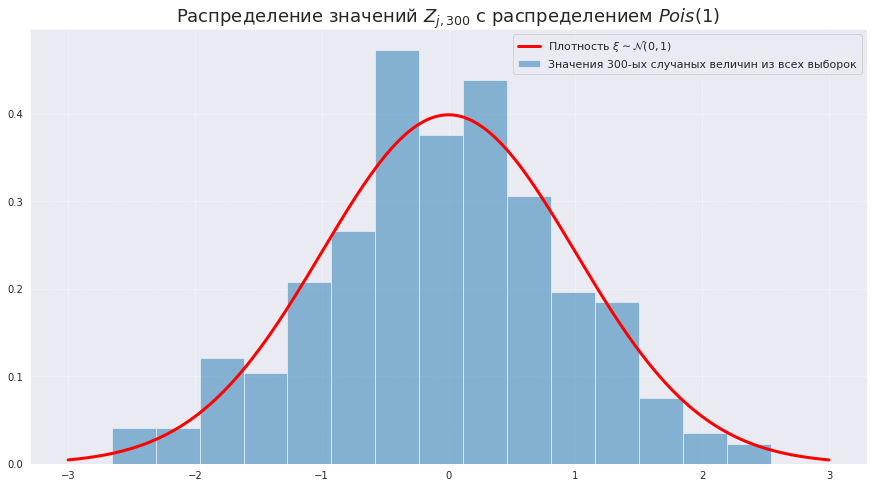

In [13]:
plot_clt_hist(clt_values_pois, xmin=-3, xmax=3, distr_name=r'$Pois(1)$')

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

`Вывод:` Предельная теорема говорит лишь о стремлении по распределению значений $Z_{jn}$ к стандартному нормальному распределению, как мы видим из графиков нельзя ничего сказать о стремлении самих членов последовательности к конкретному числу. 

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

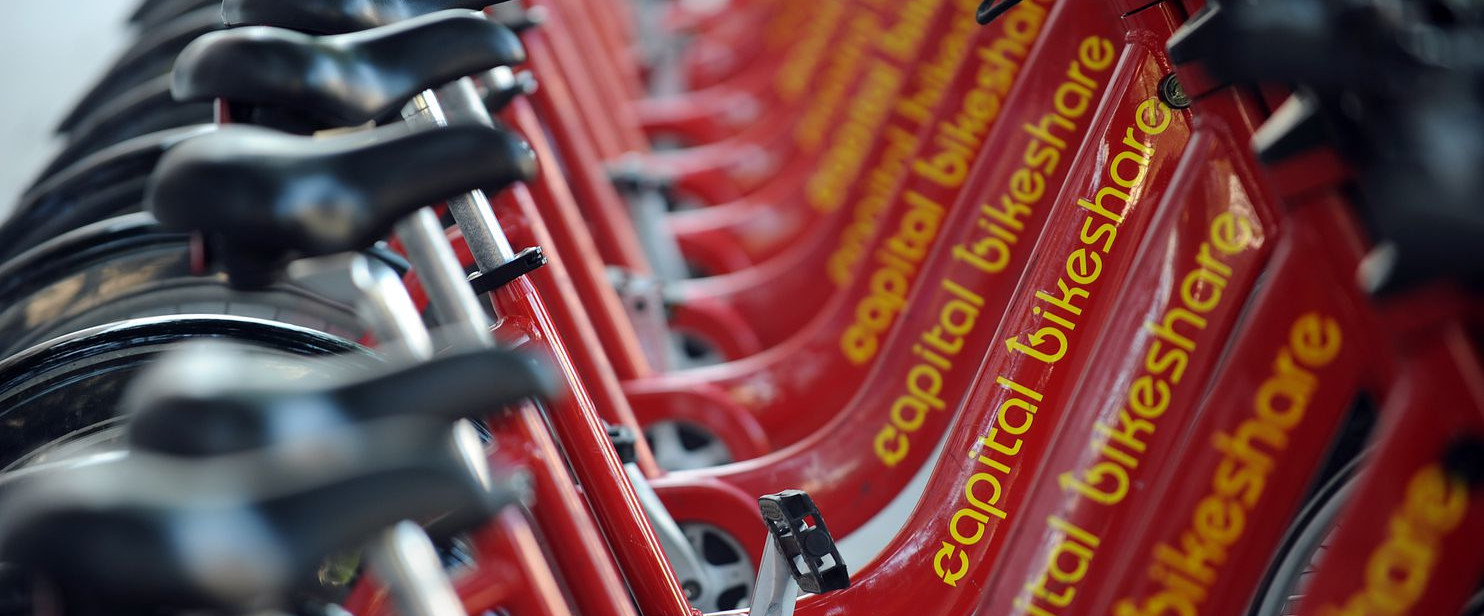

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [50]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [51]:
df = pd.read_csv('./Bike-Sharing-Dataset/day.csv', index_col='instant')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
# we need to drop casual, registered, dteday
df.drop(['dteday', 'casual', 'registered', 'yr'], axis=1, inplace=True)
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [53]:
df.shape

(731, 11)

In [54]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((584, 11), (147, 11))

Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных. 

In [55]:
sns.set(palette='Set2')

In [56]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday']
real_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed'] 
target_feature = 'cnt' 

In [57]:
def plot_pair():
    for hue in ['season', 'holiday', 'workingday']:
        g = sns.PairGrid(train[['weathersit', 'temp', 'cnt', hue]], 
                         hue=hue, diag_sharey=False, height=3)

        g.map_lower(sns.kdeplot, alpha=0.6)
        g.map_upper(plt.scatter, alpha=0.3)
        g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
                   common_norm=False)

        g.add_legend()

/Users/mikhail/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


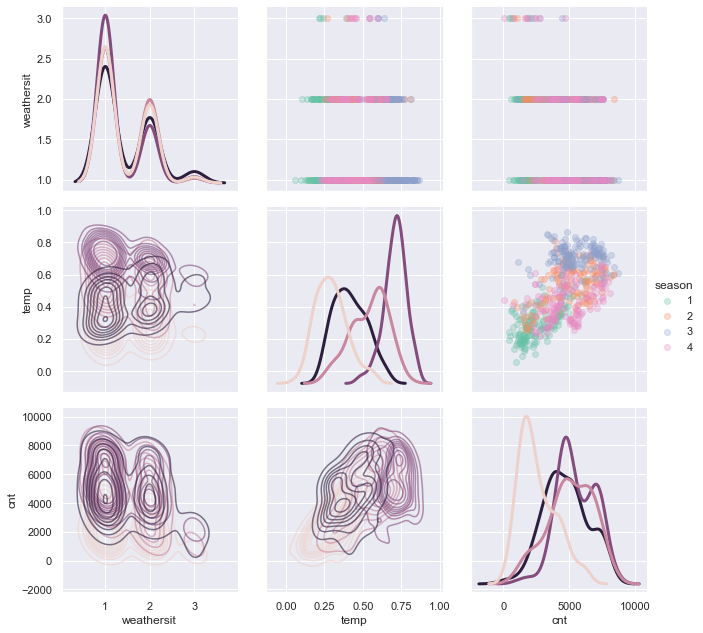

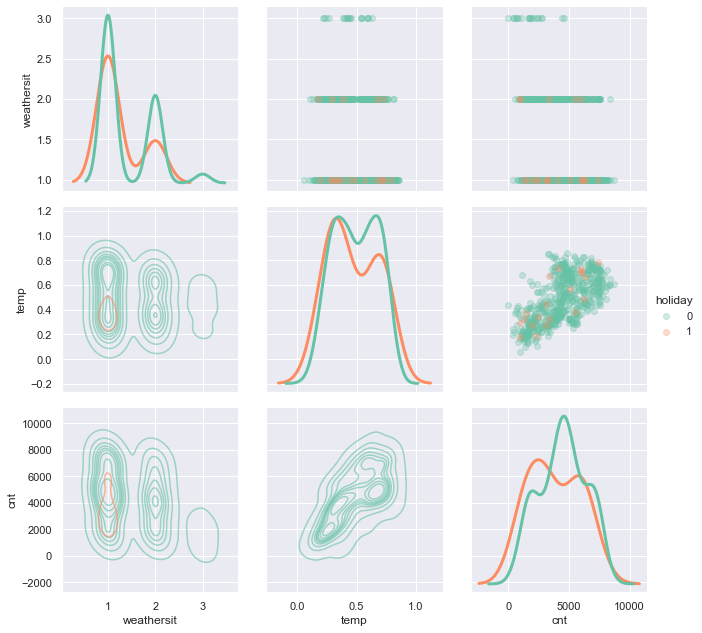

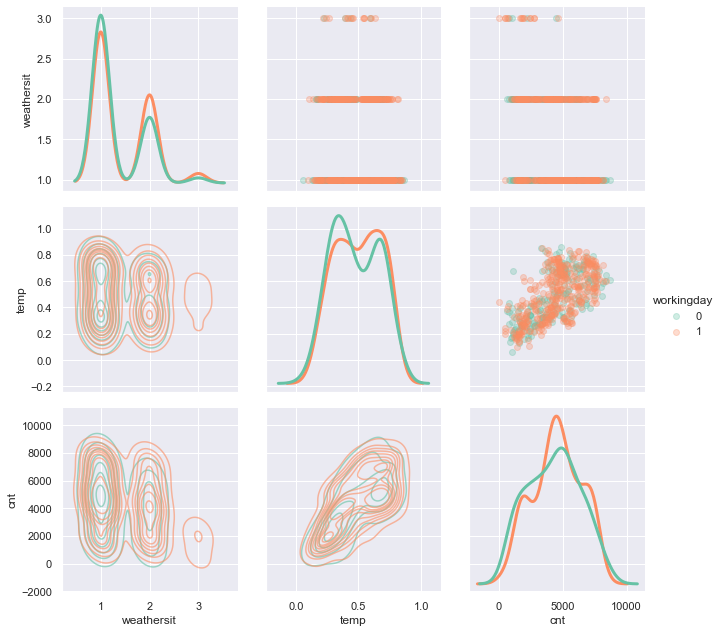

In [58]:
plot_pair()

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

Категориальные необходимо превратить в вещественные, например, превратив в векторы из 0 и 1.

In [59]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features]) 
train_cat

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [60]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(584, 27)

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

In [61]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
model.coef_

array([ -489.47217897,  7870.29692545, -1247.53574283, -2818.10176363,
       -4113.49364821,  1279.17020832,   674.70085873,  1460.92982778,
          50.73212221,   293.16209019,  -349.23244135,  -182.28957156,
        -698.96685039, -1050.33504798,  -506.35939805,   223.14448078,
         310.15858463,  -324.76909287,   -91.97150395,  -282.56492679,
        -102.35823739,   100.52841537,   -43.55166892,   -55.61292873,
         119.16221955,   366.54398844,   300.73272667])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

In [63]:
test_cat = encoder.transform(test[categorial_features])

X_test = np.hstack([test[real_features], test_cat])

In [64]:
test_preds = model.predict(X_test)

### MSE

In [65]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1331.430818060023

### MAE

In [66]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1124.5930753263283

### MAPE

In [67]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [68]:
mean_absolute_percentage_error(test[target_feature], test_preds)

30.25669877670599

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Напишем класс, который будет проводить всю работу с матрицами, учтем в нем то, что необходимо обучать константу.

In [69]:
Y_train = train[target_feature]

In [70]:
class MatrixRegression:
    def __init__(self):
        self.model_coef_ = np.empty((1))
        
    # обучает константу
    def fit(self, X_train: np.array, Y_train: np.array):
        const = np.full((X_train.shape[0],1), 1)
        X_train_with_const = np.concatenate((X_train, const), axis=1)
        
        self.model_coef_ = np.linalg.inv((X_train_with_const.T @ X_train_with_const)) @ \
                        X_train_with_const.T @ Y_train
    
    def predict(self, X_test: np.array) -> np.array:
        const = np.full((X_test.shape[0],1), 1)
        X_my_test = np.concatenate((X_test, const), axis=1)
        Y_test = X_my_test @ self.model_coef_
        Y_test = Y_test.reshape(Y_test.shape[0])
        return Y_test

In [71]:
matr_regression = MatrixRegression()
matr_regression.fit(X_train, Y_train)
y_test = matr_regression.predict(X_test)

In [72]:
mean_absolute_percentage_error(test[target_feature], y_test)

191.43693469541682

In [73]:
metrics.mean_absolute_error(test[target_feature], y_test)

5856.163456074699

In [74]:
np.linalg.matrix_rank(X_train)

26

Как мы видим ранг матрицы не равен 27, а значит какой-то из столбцов зависим от другого. Это столбцы `holiday` `working day`.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [75]:
categorial_features_fixed = ['season', 'weekday', 'workingday']
real_features_fixed = ['weathersit', 'temp', 'hum', 'windspeed'] 

In [76]:
encoder_fixed = OneHotEncoder(drop='first', sparse=False)
train_cat_fixed = encoder_fixed.fit_transform(train[categorial_features_fixed]) 
train_cat_fixed.shape

(584, 10)

In [77]:
X_train_fixed = np.hstack([train[real_features_fixed], train_cat_fixed])
X_train_fixed.shape

(584, 14)

In [78]:
Y_train = train[target_feature]

In [79]:
test_cat_fixed = encoder_fixed.transform(test[categorial_features_fixed])
X_test_fixed = np.hstack([test[real_features_fixed], test_cat_fixed])

In [80]:
# посчитаем предсказание на тестовом множестве
matr_regr_fixed = MatrixRegression()
matr_regr_fixed.fit(X_train_fixed, Y_train)
values = matr_regr_fixed.predict(X_test_fixed)

In [81]:
mean_absolute_percentage_error(test[target_feature], values)

29.879653674964967

In [82]:
metrics.mean_squared_error(test[target_feature], values) ** 0.5

1353.0480949260489

In [83]:
metrics.mean_absolute_error(test[target_feature], values)

1131.5116165407437

Сделайте выводы.

1. При данном запуске и разделении ошибки в подсчетах почти нет, библитечная регрессия обучилась так же хорошо, как и в случае матричного метода.
2. Нужно следить за зависимостью между строками, когда пользуемся матричным методом оценки параметров модели, иначе можно получить странные результаты и MAPE в 200-300 процентов.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
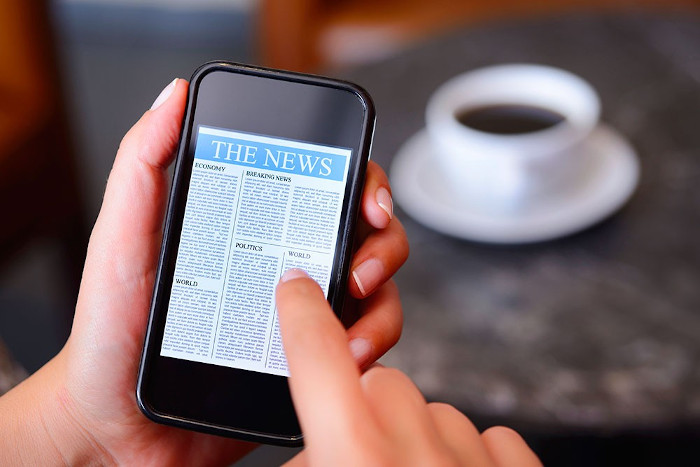



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [84]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [87]:
data_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [88]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


In [89]:
data_train['target'][21]

10

Индекс тематической группы для каждого сообщения

In [90]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

In [91]:
np.unique(data_train['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Названия тематических групп

In [92]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [93]:
len(data_train['target_names'])

20

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Посмотрим есть ли дисбаланс в данных.

In [94]:
counts = pd.value_counts(data_train['target'], sort=True)
counts.sort_values(inplace=True)

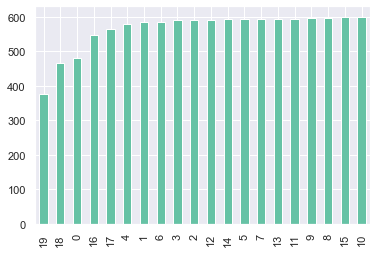

In [98]:
counts.plot(kind='bar')

Как видим, данные достаточно сбалансированны.
Напишем функцию, которая будет нормализовать строчки и слова и в них, уберет стоп слова, проведет стемминг с помощью SnowballStemmer, удалит все токены содержащие числа и пунктуацию.

In [101]:
import nltk
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

class NormalizeText:
    def __init__(self, texts: list):
        self.texts = texts
    
    def normalize(self) -> list:
        noise = stopwords.words('english')
        stemmer = SnowballStemmer('english')
        return [' '.join([stemmer.stem(w.lower()) for w in word_tokenize(t) if w.isalpha() 
                          and w not in noise]) for t in self.texts]  

Проверим как она работает.

In [180]:
normalizer = NormalizeText(texts=data_train['data'][0:2])
processed = normalizer.normalize()
processed

['i wonder anyon could enlighten car i saw day it sport car look late earli it call bricklin the door realli small in addit front bumper separ rest bodi this i know if anyon tellm model name engin spec year product car made histori whatev info funki look car pleas',
 'a fair number brave soul upgrad si clock oscil share experi poll pleas send brief messag detail experi procedur top speed attain cpu rate speed add card adapt heat sink hour usag per day floppi disk function floppi especi request i summar next two day pleas add network knowledg base done clock upgrad answer poll thank']

Применим функцию к нашим данным. А так же применим CountVectorizer к получившимся текстам.

In [181]:
normalizer = NormalizeText(texts=data_train['data'])
processed = normalizer.normalize()

In [182]:
cnt_vec = CountVectorizer(min_df=0.0001, max_df=0.5)
vec_data_train = cnt_vec.fit_transform(processed).toarray()

In [183]:
print(len(cnt_vec.get_feature_names()))

25237


In [184]:
len(vec_data_train[0])

25237

Теперь сделаем то же самое для тестовой части данных.

In [185]:
normalizer = NormalizeText(texts=data_test['data'])
processed_test = normalizer.normalize()

In [186]:
vec_data_test = cnt_vec.transform(processed_test).toarray()

In [187]:
len(vec_data_test[0])

25237

Посчитайте качество на тестовой выборке.

Будем использовать классификатор MultinomialNB — классификатор для данных, в которых все признаки являются дискретными.

In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [189]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, data_train['target'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

В случае min_df=0.0001, max_df=0.5

In [190]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, data_train['target'])
preds = multinomial_nb.predict(vec_data_test)
print(accuracy_score(data_test['target'], preds))

0.7393786510886883


Сделайте выводы.

1. Необходимо нормализовать строки, уберать стоп слова, удалять все токены содержащие числа и пунктуацию, а так же делать стремминг, это улучшает качество модели.
2. Попробовав разные параметры на валидационной части оставил самые лучшие. Необходимо отбрасывать редке встречающиеся слова, а так же убирать часто встречающиеся, это улучшает точность.
3. Нам повезло и данные были нормализованные, если было бы иначе, все было бы гораздо хуже.

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.